<h1>Lab 6-Logistic Regression</h1>

### **THEORY:**

Logistic Regression is a statistical method used for binary classification tasks. Unlike linear regression, which predicts continuous values, logistic regression is designed to predict the probability that a given input belongs to one of two classes. The output is a probability value between 0 and 1, which can be interpreted as the likelihood that the instance belongs to a specific class.

The equation of simple linear regression is given by:

$$\hat{y} = \beta_0 + \beta_1\ x$$

where  $\beta_0$ and $\beta_1$ are the regression coefficients and $x$ is the input feature.

In *logistic regression*, we pass the output of the linear regression $\hat{y}$ to a function known as the sigmoid function. The sigmoid function is of the following form:

$$\sigma(z) = \frac 1 {(1+ e^{-z})} $$


where $z$ is any input real number. So our regression model becomes: $p(x) = \frac 1 {(1+ e^{-(\beta_0 + \beta_1 x)})}$

*The output of logistic regression, $p(x)$ gives us the probability of the sample belonging to class 1, and $1-p(x)$ gives us the probability of it belonging to class 0.*

Gradient Descent Algorithmn

A real-valued function  $y = f(\mathbf{x})$ for which you want to find value of $\mathbf{x}$ that produces the smallest possible output $y$. The gradient descent algorithm works in the following steps:

Step 1: Initialize the value of ${x}$ randomly

Step 2: Calculate the gradient of $f({x})$ with respect to ${x}$ ie.  $\frac{\partial\ f({x})}{\partial\ {x}}$

Step 3: Update ${x}$ as:

$${x} = {x} - \alpha \frac{\partial\ f({x})}{\partial\ {x}}$$

$\hspace{10cm}$ here, $\alpha$ is called the **learning rate**

Step 4: Repeat steps 1, 2 and 3 until the value of $f({x})$ converges to the minimum value.

Feature Scaling

Feature scaling is an important pre-processing step in many machine learning algorithms, particularly those that rely on distance-based metrics or gradient-based optimization, such as k-nearest neighbors (KNN), support vector machines (SVM), and logistic regression. Scaling ensures that all features contribute equally to the model's performance by transforming features to a common scale.

Min-Max Scaling:

Min-Max scaling scales the features to have values between 0 and 1.

For each value of $i^{th}$ feature, $x_i$, min-max scaling scales the value as:

$$
x_i = \frac{x_i - \text{min}(x_i)}{\text{max}(x_i) - \text{min}(x_i)}
$$

where,

$\text{min}(x_i)$ = minimum of $i^{th}$ feature

$\text{max}(x_i)$ = maximum of $i^{th}$ feature

Standardization:

Standardization scales the features to have values with 0 mean and unit variance.

For each value of $i^{th}$ feature, $x_i$, standardization scales the value as:

$$
x_i = \frac{x_i - \mu_i}{\sigma_i}
$$

where,

$\mu_i$ = mean of $i^{th}$ feature

$\sigma_i$ = standard deviation of $i^{th}$ feature

Standardization is used when you want the data to be normally distributed. 

In [281]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression

1. Minimum of a function using gradient descent: Find the minimum value for y = (x - 6)^2 + sin(3x) using gradient descent. Decide stopping criteria on your own. Plot the graph of the function and the current value (x, y) at every ten steps. Try out different value for learning rate and comment on the result.

In [9]:
def f(x):
    return (x-6)**2 + np.sin(3*x)
def df(x):
    return 2*(x-6) + 3*np.cos(3*x)

In [28]:
def min_fx(start, learning_rate):
    x = start
    plt.title(f"Nayan Khusu 080bct048\nStarting Point : {start}  Learning rate : {learning_rate}")
    min_x = x
    min_y = f(x)
    for i in range(1000):
        x = x - learning_rate*df(x)
        y = f(x)
        if y < min_y:
            min_y = y
            min_x = x
        if (i%10==0):
            plt.plot(x, y, 'ro')
    plt.show()
    return min_x, min_y

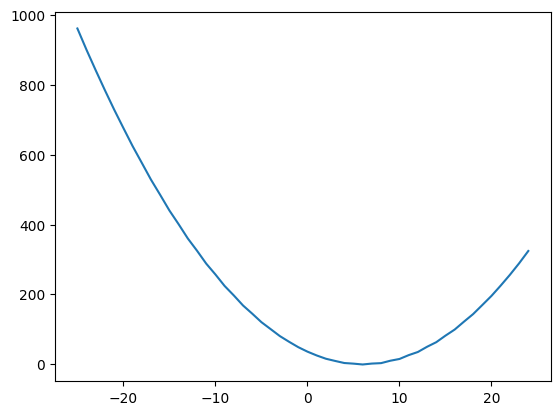

In [11]:
a = np.arange(-25,25)
plt.plot(a, f(a))

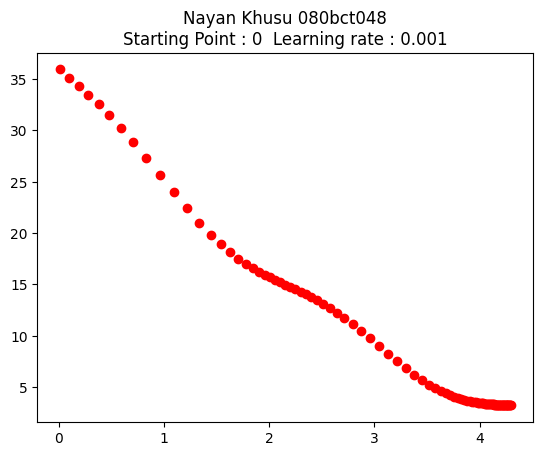

Minimum value of f(x) is 3.21682648796939 at x = 4.301144855382998


In [12]:
minx, miny = min_fx(0,0.001)
print(f"Minimum value of f(x) is {miny} at x = {minx}")

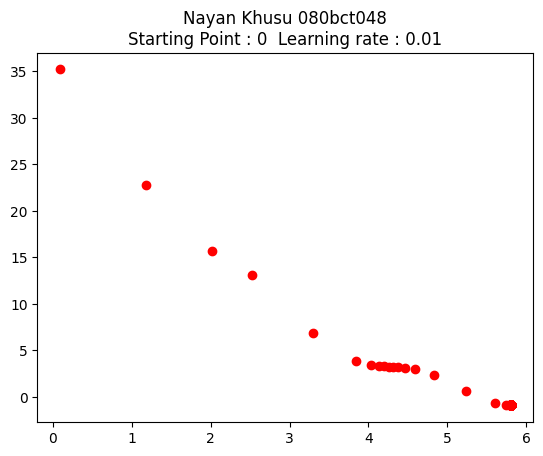

Minimum value of f(x) is -0.9527225794570388 at x = 5.803401210218622


In [26]:
minx, miny = min_fx(0,0.01)
print(f"Minimum value of f(x) is {miny} at x = {minx}")

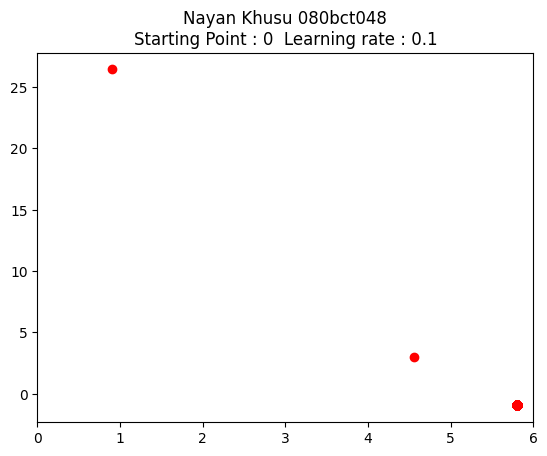

Minimum value of f(x) is -0.9527225794570386 at x = 5.803401210556443


In [27]:
plt.xlim(0,6)
minx, miny = min_fx(0, 0.1)
print(f"Minimum value of f(x) is {miny} at x = {minx}")

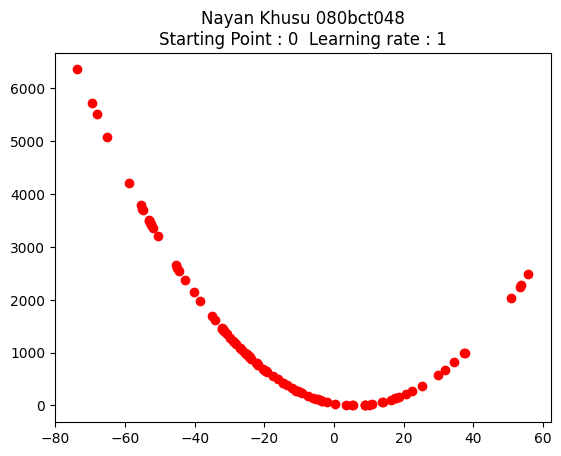

Minimum value of f(x) is -0.7102500903942228 at x = 5.592202557605494


In [15]:
minx, miny = min_fx(0, 1)
print(f"Minimum value of f(x) is {miny} at x = {minx}")

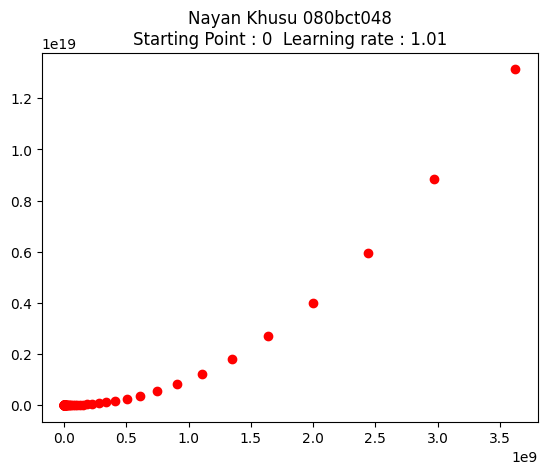

Minimum value of f(x) is -0.6603449490471052 at x = 5.571082850772189


In [16]:
minx, miny = min_fx(0, 1.01)
print(f"Minimum value of f(x) is {miny} at x = {minx}")

It is seen that the learning rate significantly affects gradient descent's performance. A small learning rate is stable but slow convergence while a high rate converges quickly but is unstable, oscillating and diverging. A moderate learning rate provided the best results, highlighting the importance of proper tuning.

2. Synthetic regression data generation: Generate 500 random sample points using following: output; y = x1 + 10x2 + 0.005x3 + noise, sample random value for x1 using normal distribution (mean = 2, std = 2.5), x2 between 0 and 1 (uniform distribution), x3 = x3 between 10,000 and 20,000 (uniform distribution) and noise = random error sampled from normal distribution (mean =0, std = 2).

In [21]:
sample_size_080bct048 = 500
x1 = np.random.normal(loc=2, scale=2.5, size=sample_size_080bct048)
x2 = np.random.uniform(low=0, high=1, size=sample_size_080bct048)
x3 = np.random.uniform(low=10000, high=20000, size=sample_size_080bct048)
noise = np.random.normal(loc=0, scale=2, size=sample_size_080bct048)

In [34]:
y = x1 + 10*x2 + 0.005*x3 + noise
data_048 = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'x3': x3,
    'y': y
})
X = data_048[['x1', 'x2', 'x3']].values
Y = data_048['y'].values
X = np.hstack((np.ones((X.shape[0], 1)), X))
data_048

,x1,x2,x3,y
0,1.923209,0.448265,18943.859152,103.778473
1,2.124272,0.715184,19271.624218,101.306028
2,5.589394,0.289869,19916.625604,110.153401
3,2.794872,0.994509,15300.638742,88.601823
4,-1.674211,0.288875,10966.025756,56.548491
...,...,...,...,...
495,2.294964,0.814872,15963.549916,87.867326
496,4.495551,0.228913,13002.562178,69.832775
497,1.746635,0.196024,18777.818292,97.164346
498,3.307345,0.773906,17810.074878,101.799247


3. Regression using gradient descent: Find using gradient descent the best fit line for a sample of synthetic data points generated above. Initialize the coefficient values as beta0 = (your_roll_number)*3/0.1, beta1 = (your_roll_number)*5/0.08, beta2 and beta3 random value of your liking. Plot SSE changed with increase in iterations.

In [98]:
roll_number = 48
beta0 = roll_number * 3 / 0.1
beta1 = roll_number * 5 / 0.08
beta2 = np.random.uniform(-1, 1)
beta3 = np.random.uniform(-1, 1)
beta = np.array([beta0, beta1, beta2, beta3])
learning_rate = 1e-13
no_of_iterations = 1000000
sample_size_080bct048 = len(Y)

In [99]:
sse_history = []
for i in range (no_of_iterations):
    y_pred = np.dot(X, beta)
    error = y_pred - Y
    gradient = np.dot(X.T, error) / sample_size_080bct048
    beta -= learning_rate * gradient
    if i%100000==0:
        print(f"Iteration : {i}, Error : {np.sum(error**2)}")
    sse_history.append(np.sum(error**2))

Iteration : 0, Error : 63904428281.199005
Iteration : 100000, Error : 28817479400.867115
Iteration : 200000, Error : 28509831656.710365
Iteration : 300000, Error : 28507130657.03057
Iteration : 400000, Error : 28507103446.41832
Iteration : 500000, Error : 28507099679.778946
Iteration : 600000, Error : 28507096118.774525
Iteration : 700000, Error : 28507092559.5799
Iteration : 800000, Error : 28507089000.401974
Iteration : 900000, Error : 28507085441.224464


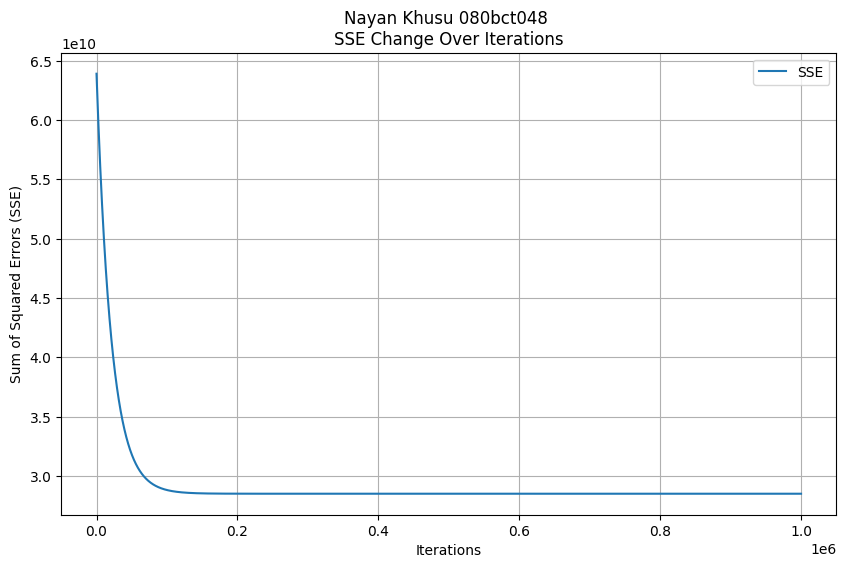

Final beta values : [ 1.44000000e+03  2.99999818e+03  4.32848467e-01 -4.38821348e-01]


In [101]:
plt.figure(figsize=(10, 6))
plt.plot(range(no_of_iterations), sse_history, label='SSE')
plt.xlabel('Iterations')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Nayan Khusu 080bct048 \nSSE Change Over Iterations')
plt.legend()
plt.grid()
plt.show()
print(f"Final beta values : {beta}")

4. Feature scaling: Using the same data we generated in question 2, perform appropriate feature scaling and then fit a regression line using gradient descent. Use same initial value for coefficients you used in assignment 2 but scale appropriately. For example if beta1 was 1 and now you scaled x1 using min-max to be about 4 times as smaller then use beta1 four times as large. (Note: This is just so that we can compare two scenarios more fairly). Plot on graph how SSE changes with increase in iteration. Comment the difference between above and this scenarios.

In [137]:
X_scaled = X.copy()
X_scaled[:,2] = (X[:,2] - np.min(X[:,2])) / (np.max(X[:,2])- np.min(X[:,2]))
X_scaled[:,3] = (X[:,3] - np.min(X[:,3])) / (np.max(X[:,3])- np.min(X[:,3]))
X_scaled[:,1] = (X[:,1] - np.mean(X[:,1])) / np.std(X[:,1])
X_scaled


array([[ 1.        ,  0.02556309,  0.44803918,  0.90083809],
       [ 1.        ,  0.10727488,  0.7152932 ,  0.93399273],
       [ 1.        ,  1.51550007,  0.28944449,  0.99923699],
       ...,
       [ 1.        , -0.04619669,  0.19548119,  0.88404245],
       [ 1.        ,  0.58807558,  0.77408854,  0.78615165],
       [ 1.        ,  0.34434319,  0.18828501,  0.40371287]],
      shape=(500, 4))

In [247]:
beta0_scaled = roll_number * 3 / 0.1
beta1_scaled = (roll_number * 5 / 0.08)*2.5
beta2_scaled = roll_number
beta3_scaled = roll_number
beta_scaled = np.array([beta0_scaled, beta1_scaled, beta2_scaled, beta3_scaled])
learning_rate_scaled = 1
no_of_iterations_scaled = 10000

In [248]:
sse_history_scaled = []
for i in range (no_of_iterations_scaled):
    y_pred = np.dot(X_scaled, beta_scaled)
    error = y_pred - Y
    gradient = np.dot(X.T, error) 
    beta_scaled -= learning_rate * gradient / sample_size_080bct048
    if i%1000==0:
        print(f"Iteration : {i}, Error : {np.sum(error**2)}")
    sse_history_scaled.append(np.sum(error**2))

Iteration : 0, Error : 29092648716.969772
Iteration : 1000, Error : 29092647422.72978
Iteration : 2000, Error : 29092646128.492325
Iteration : 3000, Error : 29092644834.25742
Iteration : 4000, Error : 29092643540.025063
Iteration : 5000, Error : 29092642245.79525
Iteration : 6000, Error : 29092640951.567986
Iteration : 7000, Error : 29092639657.34327
Iteration : 8000, Error : 29092638363.121094
Iteration : 9000, Error : 29092637068.901463


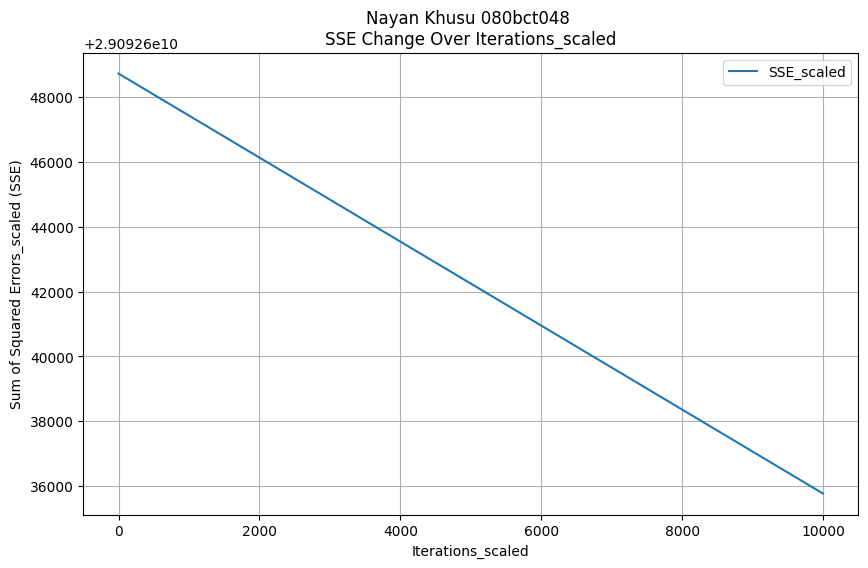

Final beta values : [1439.99999859 7499.99997894   47.99999939   47.9796788 ]


In [249]:
plt.figure(figsize=(10, 6))
plt.plot(range(no_of_iterations_scaled), sse_history_scaled, label='SSE_scaled')
plt.xlabel('Iterations_scaled')
plt.ylabel('Sum of Squared Errors_scaled (SSE)')
plt.title('Nayan Khusu 080bct048 \nSSE Change Over Iterations_scaled')
plt.legend()
plt.grid()
plt.show()
print(f"Final beta values : {beta_scaled}")

5. Sigmoid Function: Plot the sigmoid function. Next plot the logistic regression for different values of parameter coefficients. Take values for beta0 and beta1 as: beta0 = (your_roll_number) * 20, beta1 = (your_roll_number) / 20. Then change values of beta0 and beta1 and comment on how the output changes.

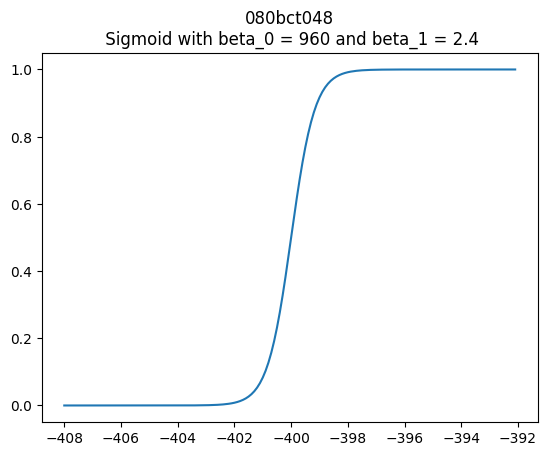

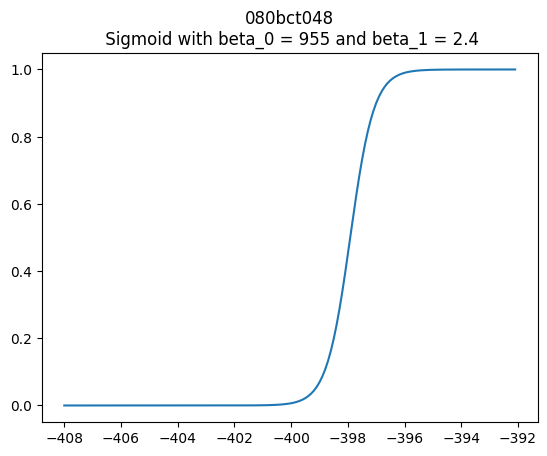

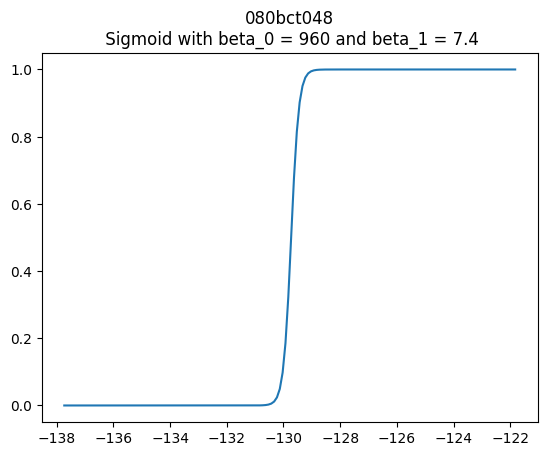

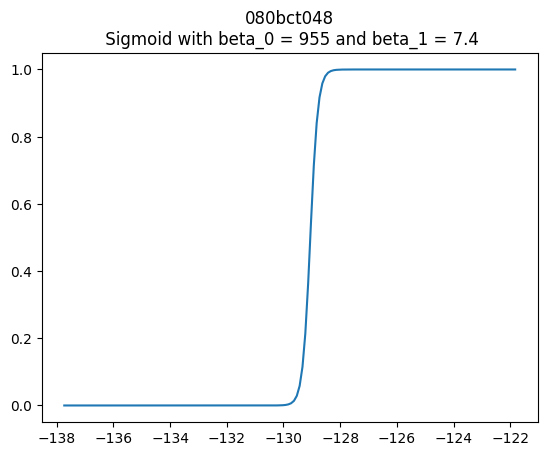

In [257]:
beta_1 = roll_number / 20

def f(x,intercept,slope):
    return intercept + slope * x

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for i in range(2):
    beta_0 = roll_number * 20
    x = np.arange(-(beta_0/beta_1)-8, -(beta_0/beta_1)+8, 0.1)               
    for j in range(2):
        linear_model = f(x,beta_0,beta_1)
        plt.figure()
        plt.plot(x,sigmoid(linear_model))
        plt.title(f"080bct048\n Sigmoid with beta_0 = {beta_0} and beta_1 = {beta_1}")
        beta_0 -=5
    beta_1 += 5

It is seen that with the change of beta_0 i.e. the intercept the plot shifts either right(if -ve change) or left(if + ve change). The change in beta_1 causes shape of curve to change. On increasing the  beta1, it steepens the curve, making the transition between probabilities faster.

6. Synthetic classification data generation: Generate a synthetic data for getting scholarship based on GRE score at a hypothetical university: A student will get scholarship if his/her GRE score is above 310 and not if less or equal. Generate a series of 200 random GRE scores and its corresponding output (get or not get scholarship). Take 0.1 proportions from above data points at random and invert the output value to simulate some naturalness.

In [273]:
def GRE_fun(x):
    if x > 310:
        return 0
    else:
        return 1

In [274]:
GRE = np.random.randint(260, 340, 200).astype(int)
result = np.array([GRE_fun(i) for i in GRE])

In [275]:
i = random.randint(0,200, 20)
result[i] = 1 - result[i]


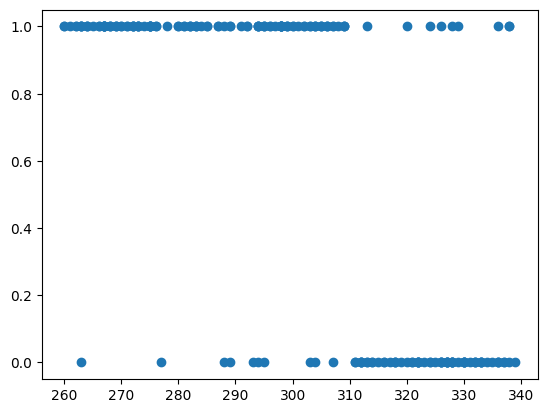

In [276]:
plt.scatter(GRE, result)

7. Logistic Regression: Fit logistic regression to data created in question 6 and plot the resulting logistic function. Predict output for GRE score 320 (take confidence threshold; p = 0.5). Confirm your prediction using sklearn library.

In [277]:
GRE_scaled = (GRE - np.mean(GRE)) / np.std(GRE)
def gradient_descent(coeff_matrix, X_datas, y_actual, learning_rate_, iterations):
    for i in range(iterations):
        y_predicted = sigmoid(np.dot(X_datas, coeff_matrix))
        coeff_matrix = coeff_matrix - learning_rate * np.dot(X_datas.T, (y_predicted - y_actual))
    return coeff_matrix

coeff_matrix = np.array([0, 0]).reshape(-1,1)
X_datas = np.hstack([np.ones(len(GRE_scaled)).reshape(-1,1) , GRE_scaled.reshape(-1,1)])
y_actual = y.reshape(-1,1)

learning_rate_ = 0.0001
iterations_ = 1000000

coeff_matrix = gradient_descent(coeff_matrix, X_datas, y_actual, learning_rate_, iterations_)        

In [278]:
def prediction(x_predict):
    x_scaled = (x_predict - np.mean(x)) / np.std(x)
    X = np.array([1,x_scaled])
    prediction_threshold = 0.5
    y_predict = ((sigmoid( np.dot(X,coeff_matrix)))/prediction_threshold).astype(int)
    
    return y_predict

In [279]:
print(prediction(320))

[1]


In [282]:
model = LogisticRegression()
model.fit(GRE.reshape(-1,1) , y_actual.flatten())

print(model.predict(np.array([320]).reshape(1,-1)))

[1]


**Discusion and Conclusion**

Hence, in this we learn about Logistic Regression. We were made familiar with sigmoid function and learned how different parameter affect this function. We learned the Gradiant Decent Algorithm and wrote programs that implemented these algorithm. We used the sklearn library to varify our results. We understood the concept of scaling and differnt mends of scaling. Over all this lab was very helpful and we learn a lot of things.